In [8]:
import numpy as np
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import relaxation_times as rt
import average_correl_functions as acf
import matplotlib.pyplot as plt

In [2]:
expT1_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_T1_experiment.dat")
expT2_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_T2_experiment.dat")
expNOE_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_hetnoe_experiment.dat")

expT1_eYqjD=np.loadtxt("../../experimental_relaxation_data/eYqjD_DSDS_T1_experiment.dat")
expT2_eYqjD=np.loadtxt("../../experimental_relaxation_data/eYqjD_DSDS_T2_experiment.dat")
expNOE_eYqjD=np.loadtxt("../../experimental_relaxation_data/eYqjD_DSDS_hetnoe_experiment.dat")

expT1_yFis1=np.loadtxt("../../experimental_relaxation_data/yFis1_DSDS_T1_experiment.dat")
expT2_yFis1=np.loadtxt("../../experimental_relaxation_data/yFis1_DSDS_T2_experiment.dat")
expNOE_yFis1=np.loadtxt("../../experimental_relaxation_data/yFis1_DSDS_hetnoe_experiment.dat")

expT1_hMff=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_T1_experiment.dat")
expT2_hMff=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_T2_experiment.dat")
expNOE_hMff=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_hetnoe_experiment.dat")

expT1_mg2=np.loadtxt("../../experimental_relaxation_data/MG2_DSDS_T1_experiment.dat")
expT2_mg2=np.loadtxt("../../experimental_relaxation_data/MG2_DSDS_T2_experiment.dat")
expNOE_mg2=np.loadtxt("../../experimental_relaxation_data/MG2_DSDS_hetnoe_experiment.dat")

expT1_GWALP=np.loadtxt("../../experimental_relaxation_data/Gwalp_DSDS_T1_experiment.dat")
expT2_GWALP=np.loadtxt("../../experimental_relaxation_data/Gwalp_DSDS_T2_experiment.dat")
expNOE_GWALP=np.loadtxt("../../experimental_relaxation_data/Gwalp_DSDS_hetnoe_experiment.dat")

In [6]:
output_path_relax="../../../relax_times_yamls/protein/raw_data/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../timescales_yamls/protein/raw_data/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_23500water_replica1
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_73800water_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_N

In [10]:
peptides={"eElab":40,"eYqjD":50,"yFis1":50,"hMff":50,"mag2":50,"GWALP_dimer":70,"GWALP":80}
replicas=["replica1","replica2","replica3"]
T1={}
T2={}
NOE={}

for peptide in peptides:
    T1[peptide]={}
    T2[peptide]={}
    NOE[peptide]={}

for key in relaxation_yamls:
    for peptide in peptides:
        if peptide in key and str(peptides[peptide]) in key:
            
            for replica in replicas:
                if replica in key:
                    T1[peptide][replica]=[]
                    T2[peptide][replica]=[]
                    NOE[peptide][replica]=[]
                    
                    for analysis in relaxation_yamls[key]:
                        if (relaxation_yamls[key][analysis]["info"]["00_nuclei"]=="15N"
                           and relaxation_yamls[key][analysis]["info"]['02_magnetic_field_[MHz]']== 850.0
                           and relaxation_yamls[key][analysis]["info"]['03_N_exp_to_fit'] == 100
                           and relaxation_yamls[key][analysis]["info"]['04_smallest_corr_time_[s]']== 1e-12
                           and relaxation_yamls[key][analysis]["info"]['05_biggest_corr_time_[s]']== 1e-07
                           and relaxation_yamls[key][analysis]["info"]['06_analyze'] == 0.02):
                            
                            
                            if len(T1[peptide][replica])==0:
                                for pe in relaxation_yamls[key][analysis]["results"]:
                                    T1[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["T1"])
                                    T2[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["T2"])
                                    NOE[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["hetNOE"])


peptides={"eElab":40,"eYqjD":50,"yFis1":50,"hMff":50,"mag2":50,"GWALP":80}
for peptide in peptides:
    print(peptide)
    apT1=[]
    apT2=[]
    apNOE=[]
    for j,replica in enumerate(T1[peptide]):
        apT1.append(T1[peptide][replica])
        apT2.append(T2[peptide][replica])
        apNOE.append(NOE[peptide][replica])
    
    
    T1[peptide]["aver"]=0
    T2[peptide]["aver"]=0
    NOE[peptide]["aver"]=0
    
    for k in range(j+1):
        T1[peptide]["aver"]+=(np.array(apT1[k]))/(j+1)
        T2[peptide]["aver"]+=(np.array(apT2[k]))/(j+1)
        NOE[peptide]["aver"]+=(np.array(apNOE[k]))/(j+1)
    
    T1[peptide]["error"]=[np.std([apT1[0][i],apT1[1][i],apT1[2][i]])/np.sqrt(3) for i in range(len(apT1[0]))]
    T2[peptide]["error"]=[np.std([apT2[0][i],apT2[1][i],apT2[2][i]])/np.sqrt(3) for i in range(len(apT2[0]))]
    NOE[peptide]["error"]=[np.std([apNOE[0][i],apNOE[1][i],apNOE[2][i]])/np.sqrt(3) for i in range(len(apNOE[0]))]
      

#print("first came")    
peptides={"GWALP_dimer":70}
for peptide in peptides:
    apT1=[]
    apT2=[]
    apNOE=[]
    for j,replica in enumerate(T1[peptide]):
        apT1.append(T1[peptide][replica])
        apT2.append(T2[peptide][replica])
        apNOE.append(NOE[peptide][replica])
    
    
    T1[peptide]["aver"]=0
    T2[peptide]["aver"]=0
    NOE[peptide]["aver"]=0
    
    for k in range(j+1):
        T1[peptide]["aver"]+=(np.array(apT1[k]))/(j+1)
        T2[peptide]["aver"]+=(np.array(apT2[k]))/(j+1)
        NOE[peptide]["aver"]+=(np.array(apNOE[k]))/(j+1)
    
    
    T1[peptide]["error"]=[np.std([apT1[0][i],apT1[1][i],apT1[0][i+len(apT1[0])//2],apT1[1][i+len(apT1[0])//2]])/np.sqrt(4) for i in range(len(apT1[0])//2)]
    T2[peptide]["error"]=[np.std([apT2[0][i],apT2[1][i],apT2[0][i+len(apT2[0])//2],apT2[1][i+len(apT2[0])//2]])/np.sqrt(4) for i in range(len(apT2[0])//2)]
    NOE[peptide]["error"]=[np.std([apNOE[0][i],apNOE[1][i],apNOE[0][i+len(apNOE[0])//2],apNOE[1][i+len(apNOE[0])//2]])/np.sqrt(4) for i in range(len(apNOE[0])//2)]
    
    
    apT1=[]
    apT2=[]
    apNOE=[]
    for i in range(len(T1[peptide]["aver"])//2):
        apT1.append((T1[peptide]["aver"][i]+T1[peptide]["aver"][i+len(T1[peptide]["aver"])//2])/2)
        apT2.append((T2[peptide]["aver"][i]+T2[peptide]["aver"][i+len(T2[peptide]["aver"])//2])/2)
        apNOE.append((NOE[peptide]["aver"][i]+NOE[peptide]["aver"][i+len(NOE[peptide]["aver"])//2])/2)
    T1[peptide]["aver"]=apT1
    T2[peptide]["aver"]=apT2
    NOE[peptide]["aver"]=apNOE
    
      


eElab
eYqjD
yFis1
hMff
mag2
GWALP


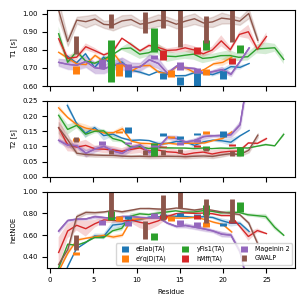

In [11]:
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)
    
ax1.set_ylabel("T1 [s]")

ax2.set_ylabel("T2 [s]")

ax3.set_ylabel("hetNOE")
ax3.set_xlabel("Residue")
max_T1=0
max_T2=0
max_noe=0
min_noe=0

ax1.set_ylim(0.5,1.2)
ax2.set_ylim(0.0,0.45)
ax3.set_ylim(-0.1,1.1)

ax1.set_ylim(0.6,1.02)
ax2.set_ylim(0.0,0.25)
ax3.set_ylim(0.3,1)
    
    
marksi=5
#ax1.set_yticks((0.9,1),fontname = "Times")

sim_x=np.linspace(2,len(T1["eElab"]["aver"])+2,len(T1["eElab"]["aver"]))
ax1.plot(sim_x,T1["eElab"]["aver"],linewidth=1)
ax1.fill_between(sim_x, T1["eElab"]["aver"]-T1["eElab"]["error"], T1["eElab"]["aver"]+T1["eElab"]["error"],alpha=0.2)
ax2.plot(sim_x,T2["eElab"]["aver"],linewidth=1)
ax2.fill_between(sim_x, T2["eElab"]["aver"]-T2["eElab"]["error"], T2["eElab"]["aver"]+T2["eElab"]["error"],alpha=0.2)
ax3.plot(sim_x,NOE["eElab"]["aver"],linewidth=1)
ax3.fill_between(sim_x, NOE["eElab"]["aver"]-NOE["eElab"]["error"], NOE["eElab"]["aver"]+NOE["eElab"]["error"],alpha=0.2)


sim_x=np.linspace(1,len(T1["eYqjD"]["aver"])+1,len(T1["eYqjD"]["aver"]))
ax1.plot(sim_x,T1["eYqjD"]["aver"],linewidth=1)
ax1.fill_between(sim_x, T1["eYqjD"]["aver"]-T1["eYqjD"]["error"], T1["eYqjD"]["aver"]+T1["eYqjD"]["error"],alpha=0.2)
ax2.plot(sim_x,T2["eYqjD"]["aver"],linewidth=1)
ax2.fill_between(sim_x, T2["eYqjD"]["aver"]-T2["eYqjD"]["error"], T2["eYqjD"]["aver"]+T2["eYqjD"]["error"],alpha=0.2)
ax3.plot(sim_x,NOE["eYqjD"]["aver"],linewidth=1)
ax3.fill_between(sim_x, NOE["eYqjD"]["aver"]-NOE["eYqjD"]["error"], NOE["eYqjD"]["aver"]+NOE["eYqjD"]["error"],alpha=0.2)


sim_x=np.linspace(1,len(T1["yFis1"]["aver"])+1,len(T1["yFis1"]["aver"]))
ax1.plot(sim_x,T1["yFis1"]["aver"],linewidth=1)
ax1.fill_between(sim_x, T1["yFis1"]["aver"]-T1["yFis1"]["error"], T1["yFis1"]["aver"]+T1["yFis1"]["error"],alpha=0.2)
ax2.plot(sim_x,T2["yFis1"]["aver"],linewidth=1)
ax2.fill_between(sim_x, T2["yFis1"]["aver"]-T2["yFis1"]["error"], T2["yFis1"]["aver"]+T2["yFis1"]["error"],alpha=0.2)
ax3.plot(sim_x,NOE["yFis1"]["aver"],linewidth=1)
ax3.fill_between(sim_x, NOE["yFis1"]["aver"]-NOE["yFis1"]["error"], NOE["yFis1"]["aver"]+NOE["yFis1"]["error"],alpha=0.2)


sim_x=np.linspace(1,len(T1["hMff"]["aver"])+1,len(T1["hMff"]["aver"]))
ax1.plot(sim_x,T1["hMff"]["aver"],linewidth=1)
ax1.fill_between(sim_x, T1["hMff"]["aver"]-T1["hMff"]["error"], T1["hMff"]["aver"]+T1["hMff"]["error"],alpha=0.2)
ax2.plot(sim_x,T2["hMff"]["aver"],linewidth=1)
ax2.fill_between(sim_x, T2["hMff"]["aver"]-T2["hMff"]["error"], T2["hMff"]["aver"]+T2["hMff"]["error"],alpha=0.2)
ax3.plot(sim_x,NOE["hMff"]["aver"],linewidth=1)
ax3.fill_between(sim_x, NOE["hMff"]["aver"]-NOE["hMff"]["error"], NOE["hMff"]["aver"]+NOE["hMff"]["error"],alpha=0.2)

sim_x=np.linspace(1,len(T1["mag2"]["aver"])+1,len(T1["mag2"]["aver"]))
ax1.plot(sim_x,T1["mag2"]["aver"],linewidth=1,c="C4")
ax1.fill_between(sim_x, T1["mag2"]["aver"]-T1["mag2"]["error"], T1["mag2"]["aver"]+T1["mag2"]["error"],alpha=0.2,color="C4")
ax2.plot(sim_x,T2["mag2"]["aver"],linewidth=1,c="C4")
ax2.fill_between(sim_x, T2["mag2"]["aver"]-T2["mag2"]["error"], T2["mag2"]["aver"]+T2["mag2"]["error"],alpha=0.2,color="C4")
ax3.plot(sim_x,NOE["mag2"]["aver"],linewidth=1,c="C4")
ax3.fill_between(sim_x, NOE["mag2"]["aver"]-NOE["mag2"]["error"], NOE["mag2"]["aver"]+NOE["mag2"]["error"],alpha=0.2,color="C4")

sim_x=np.linspace(1,len(T1["mag2"]["aver"])+1,len(T1["mag2"]["aver"]))
ax1.plot(sim_x,T1["mag2"]["aver"],linewidth=1)
ax1.fill_between(sim_x, T1["mag2"]["aver"]-T1["mag2"]["error"], T1["mag2"]["aver"]+T1["mag2"]["error"],alpha=0.2)
ax2.plot(sim_x,T2["mag2"]["aver"],linewidth=1)
ax2.fill_between(sim_x, T2["mag2"]["aver"]-T2["mag2"]["error"], T2["mag2"]["aver"]+T2["mag2"]["error"],alpha=0.2)
ax3.plot(sim_x,NOE["mag2"]["aver"],linewidth=1)
ax3.fill_between(sim_x, NOE["mag2"]["aver"]-NOE["mag2"]["error"], NOE["mag2"]["aver"]+NOE["mag2"]["error"],alpha=0.2)


sim_x=np.linspace(1,len(T1["GWALP_dimer"]["aver"])+1,len(T1["GWALP_dimer"]["aver"]))
ax1.plot(sim_x,T1["GWALP_dimer"]["aver"],linewidth=1,color="C5")
ax1.fill_between(sim_x, np.array(T1["GWALP_dimer"]["aver"])-np.array(T1["GWALP_dimer"]["error"]), np.array(T1["GWALP_dimer"]["aver"])+np.array(T1["GWALP_dimer"]["error"]),alpha=0.2,color="C5")
ax2.plot(sim_x,T2["GWALP_dimer"]["aver"],linewidth=1,color="C5")
ax2.fill_between(sim_x, np.array(T2["GWALP_dimer"]["aver"])-np.array(T2["GWALP_dimer"]["error"]), np.array(T2["GWALP_dimer"]["aver"])+np.array(T2["GWALP_dimer"]["error"]),alpha=0.2,color="C5")
ax3.plot(sim_x,NOE["GWALP_dimer"]["aver"],linewidth=1,color="C5")
ax3.fill_between(sim_x, np.array(NOE["GWALP_dimer"]["aver"])-np.array(NOE["GWALP_dimer"]["error"]), np.array(NOE["GWALP_dimer"]["aver"])+np.array(NOE["GWALP_dimer"]["error"]),alpha=0.2,color="C5")



ax1.errorbar(expT1_eElab[:,0],expT1_eElab[:,2],expT1_eElab[:,3],None,"none",color="C0",markersize=1,linewidth=5)
ax2.errorbar(expT2_eElab[:,0],expT2_eElab[:,2],expT2_eElab[:,3],None,"none",color="C0",markersize=1,linewidth=5,label="eElab(TA)")
ax3.errorbar(expNOE_eElab[:,0],expNOE_eElab[:,2],expNOE_eElab[:,3],None,"none",color="C0",markersize=1,linewidth=5,label="eElab(TA)")



ax1.errorbar(expT1_eYqjD[:,0],expT1_eYqjD[:,2],expT1_eYqjD[:,3],None,"none",color="C1",markersize=1,linewidth=5)
ax2.errorbar(expT2_eYqjD[:,0],expT2_eYqjD[:,2],expT2_eYqjD[:,3],None,"none",color="C1",markersize=1,linewidth=5,label="eYqjD(TA)")
ax3.errorbar(expNOE_eYqjD[:,0],expNOE_eYqjD[:,2],expNOE_eYqjD[:,3],None,"none",color="C1",markersize=1,linewidth=5,label="eYqjD(TA)")



ax1.errorbar(expT1_yFis1[:,0],expT1_yFis1[:,2],expT1_yFis1[:,3],None,"none",color="C2",markersize=1,linewidth=5)
ax2.errorbar(expT2_yFis1[:,0],expT2_yFis1[:,2],expT2_yFis1[:,3],None,"none",color="C2",markersize=1,linewidth=5,label="yFis1(TA)")
ax3.errorbar(expNOE_yFis1[:,0],expNOE_yFis1[:,2],expNOE_yFis1[:,3],None,"none",color="C2",markersize=1,linewidth=5,label="yFis1(TA)")


ax1.errorbar(expT1_hMff[:,0],expT1_hMff[:,2],expT1_hMff[:,3],None,"none",color="C3",markersize=1,linewidth=5)
ax2.errorbar(expT2_hMff[:,0],expT2_hMff[:,2],expT2_hMff[:,3],None,"none",color="C3",markersize=1,linewidth=5,label="hMff(TA)")
ax3.errorbar(expNOE_hMff[:,0],expNOE_hMff[:,2],expNOE_hMff[:,3],None,"none",color="C3",markersize=1,linewidth=5,label="hMff(TA)")



ax1.errorbar(expT1_mg2[:,0],expT1_mg2[:,2],expT1_mg2[:,3],None,"none",color="C4",markersize=1,linewidth=5)
ax2.errorbar(expT2_mg2[:,0],expT2_mg2[:,2],expT2_mg2[:,3],None,"none",color="C4",markersize=1,linewidth=5,label="Mageinin 2")
ax3.errorbar(expNOE_mg2[:,0],expNOE_mg2[:,2],expNOE_mg2[:,3],None,"none",color="C4",markersize=1,linewidth=5,label="Mageinin 2")



ax1.errorbar(expT1_GWALP[:,0],expT1_GWALP[:,2],expT1_GWALP[:,3],None,"none",color="C5",markersize=1,linewidth=3.5)
ax2.errorbar(expT2_GWALP[:,0],expT2_GWALP[:,2],expT2_GWALP[:,3],None,"none",color="C5",markersize=1,linewidth=3.5,label="GWALP")
ax3.errorbar(expNOE_GWALP[:,0],expNOE_GWALP[:,2],expNOE_GWALP[:,3],None,"none",color="C5",markersize=1,linewidth=3.5,label="GWALP")



from matplotlib.ticker import FormatStrFormatter

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))



ax3.legend(ncol=3,loc=4,prop={'size': 4.5})

plt.savefig("relaxData_NMR_MD_new_mag3.pdf")

In [25]:
peptides={"eElab":40,"eYqjD":50,"yFis1":50,"hMff":50,"mag2":50,"GWALP_dimer":70}
start=1
for peptide in peptides:
    if peptide=='eElab':
        start=2
    sim_x=np.linspace(start,len(T1[peptide]["aver"])+start-1,len(T1[peptide]["aver"]))
    
    to_save=[sim_x,T1[peptide]['aver'],T1[peptide]['error']]
    save_name=f'exported_simulation_data/T1_{peptide}.dat'
    np.savetxt(save_name,np.transpose(to_save),header=f" Simulation Data for: {peptide} \n CHARMM36 ff + OPC water \n Residue, SRT [s], error [s]")
    
    to_save=[sim_x,T2[peptide]['aver'],T2[peptide]['error']]
    save_name=f'exported_simulation_data/T2_{peptide}.dat'
    np.savetxt(save_name,np.transpose(to_save),header=f" Simulation Data for: {peptide} \n CHARMM36 ff + OPC water \n Residue, SRT [s], error [s]")

    to_save=[sim_x,NOE[peptide]['aver'],NOE[peptide]['error']]
    save_name=f'exported_simulation_data/hetNOE_{peptide}.dat'
    np.savetxt(save_name,np.transpose(to_save),header=f" Simulation Data for: {peptide} \n CHARMM36 ff + OPC water \n Residue, SRT [s], error [s]")

    
    